# Medical Insurance cost prediction


Importing the Dependencies

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

Data Collection and analysis

In [76]:
insurance_dataset = pd.read_csv('insurance.csv')

In [77]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
insurance_dataset.shape

(1338, 7)

In [79]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [80]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [81]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


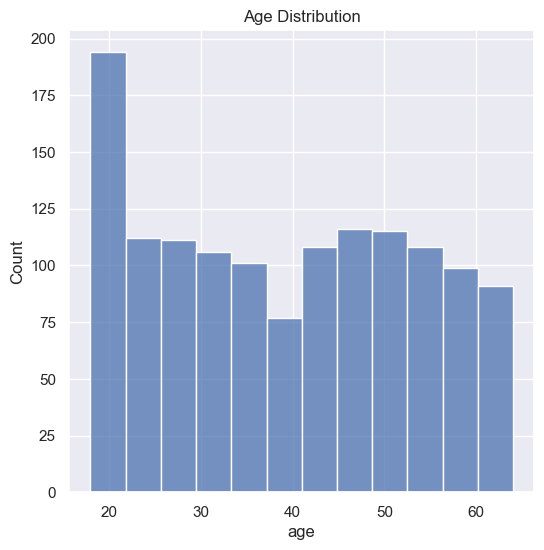

In [82]:
# Distribution of Age Value
sns.set()
plt.figure(figsize = (6,6))
sns.histplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

In [83]:
# Checking repetation of age
insurance_dataset['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

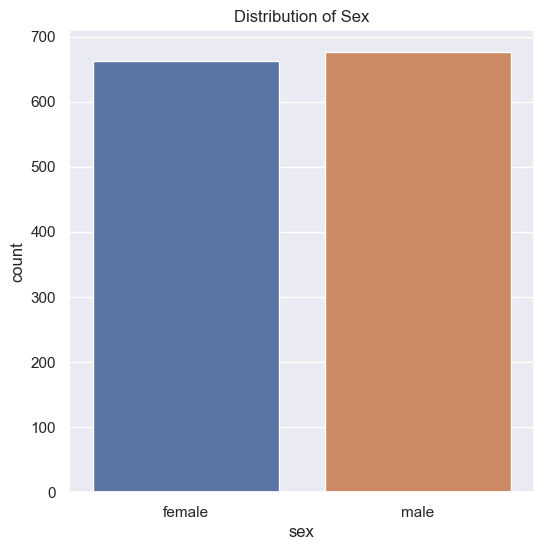

In [84]:
# Distribution of Sex 
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data = insurance_dataset)
plt.title('Distribution of Sex')
plt.show()

In [85]:
# Checking Number of Male and Female
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

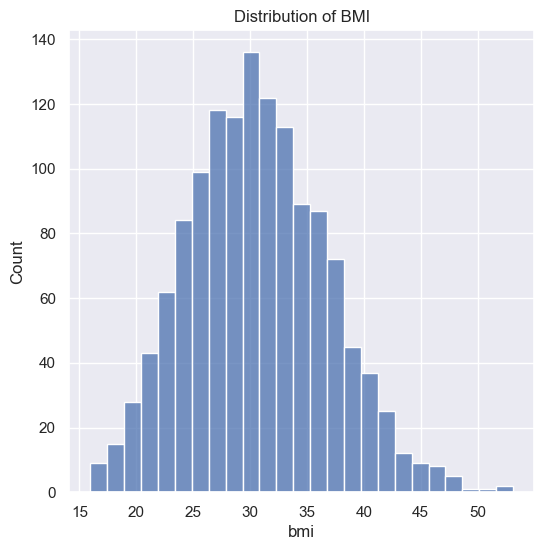

In [86]:
plt.figure(figsize = (6,6))
sns.histplot(insurance_dataset['bmi'])
plt.title('Distribution of BMI')
plt.show()

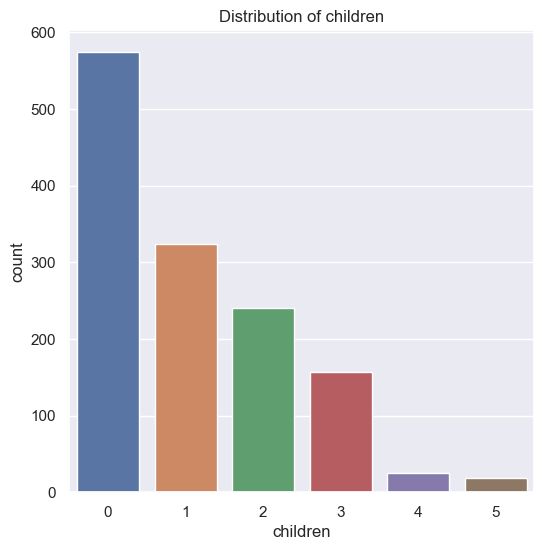

In [87]:
# Visualizing the graph of children
plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = insurance_dataset)
plt.title('Distribution of children')
plt.show()

In [88]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

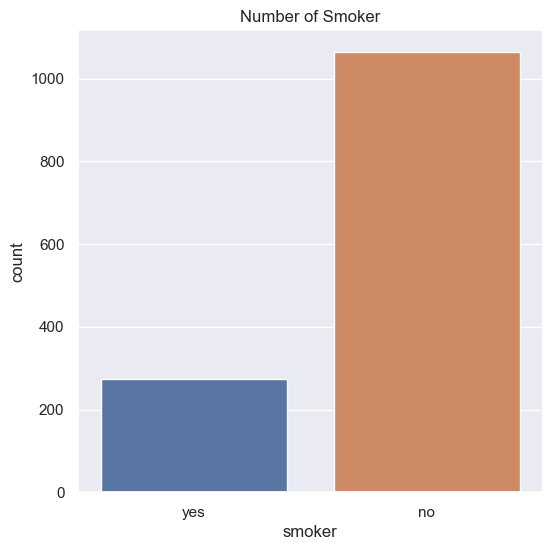

In [89]:
# Distribution of smoker
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = insurance_dataset)
plt.title('Number of Smoker')
plt.show()

In [90]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

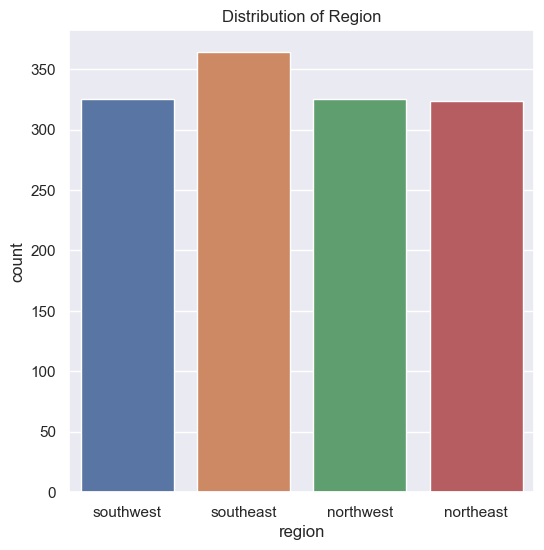

In [91]:
# Distribution of region
plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = insurance_dataset)
plt.title('Distribution of Region')
plt.show()

In [92]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

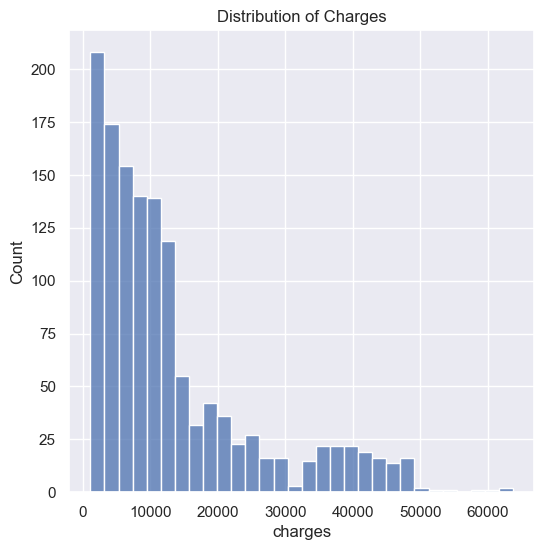

In [93]:
# Distribution of Charges
plt.figure(figsize = (6,6))
sns.histplot(insurance_dataset['charges'])
plt.title('Distribution of Charges')
plt.show()

# Data Pre-Processing

In [94]:
# Encodeing the sex column

insurance_dataset.replace({'sex': {'male':0, 'female':1}}, inplace = True)

# Encodeing the Smoker column

insurance_dataset.replace({'smoker':{'no':0, 'yes':1}}, inplace = True)

# Encodeing the Region column

insurance_dataset.replace({'region':{'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}}, inplace = True)

In [95]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


Spliting the Features and target

In [96]:
X = insurance_dataset.drop(columns = 'charges', axis = 1)
Y = insurance_dataset['charges']

In [97]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0       1
2      28    0  33.000         3       0       1
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       1
1336   21    1  25.800         0       0       0
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [98]:
linear_regression_model = LinearRegression()

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [100]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [101]:
linear_regression_model.fit(X_train, Y_train)

LinearRegression()

In [102]:
training_data_prediction = linear_regression_model.predict(X_train)

In [103]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print(r2_train)

0.7519923667088932


In [104]:
test_data_prediction = linear_regression_model.predict(X_test)

In [105]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print(r2_test)

0.7445422986536504


# Building a predictive system

In [106]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = linear_regression_model.predict(input_data_reshaped)

print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  27493.785727116156


/Users/satyam/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
